In [1]:
import pandas as pd               # уже знакомый вам пакет для работы с таблицами
import numpy as np                # смутно знакомый вам пакет для работы с матрицами
import matplotlib.pyplot as plt   # уже знакомый вам пакет для картинок 
import seaborn as sns             # ещё один пакет для картинок 

%matplotlib inline

In [2]:
# грязный хак от надоедливых предупреждений
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('./data.csv', index_col='id')
print(df.shape)
df.head(2)

(569, 32)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

In [5]:
# смотрим на object'ы:
objects = df.loc[:, df.dtypes == np.object]
objects.tail(5)

,diagnosis
id,
926424,M
926682,M
926954,M
927241,M
92751,B


In [6]:
# похоже на категориальные признаки. Посмотрим на разнообразие:
for j in objects.columns.values: 
    print(j+":", np.unique(df[j]).size)

diagnosis: 2


In [7]:
# Ok, либо болен либо нет. 
# Видимо, это целевой параметр, и множетво ответов предполагается из двух вариантов. 
# Поэтому делаем get_dummies и спокойно дропаем один из двух новых столбцов.
diagnosis_class = pd.get_dummies(df["diagnosis"], drop_first=True, prefix="diagnosis")
df = pd.concat([df.drop("diagnosis", axis=1), diagnosis_class], axis=1)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_M
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se             

In [9]:
# Ok, все в цифрах. теперь смотрим все ли в порядке с цифрами. Ищем NaN.
df.isnull().sum()

radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
diagnosis_M                  0
dtype: i

In [10]:
# df.isnull.sum() может не показывать все что нам интересно. и глазами смотреть лениво. 
# покажем только то что содержит NaN
for j in df.isnull().sum().to_numpy().nonzero():
    print(df.isnull().sum()[j])

Unnamed: 32    569
dtype: int64


In [11]:
sum(df["Unnamed: 32"])

nan

In [12]:
# поменяем на 0:
df["Unnamed: 32"] = df["Unnamed: 32"].fillna(0)
for j in df.isnull().sum().to_numpy().nonzero():
    print(df.isnull().sum()[j])

Series([], dtype: int64)


In [13]:
sum(df["Unnamed: 32"])

0.0

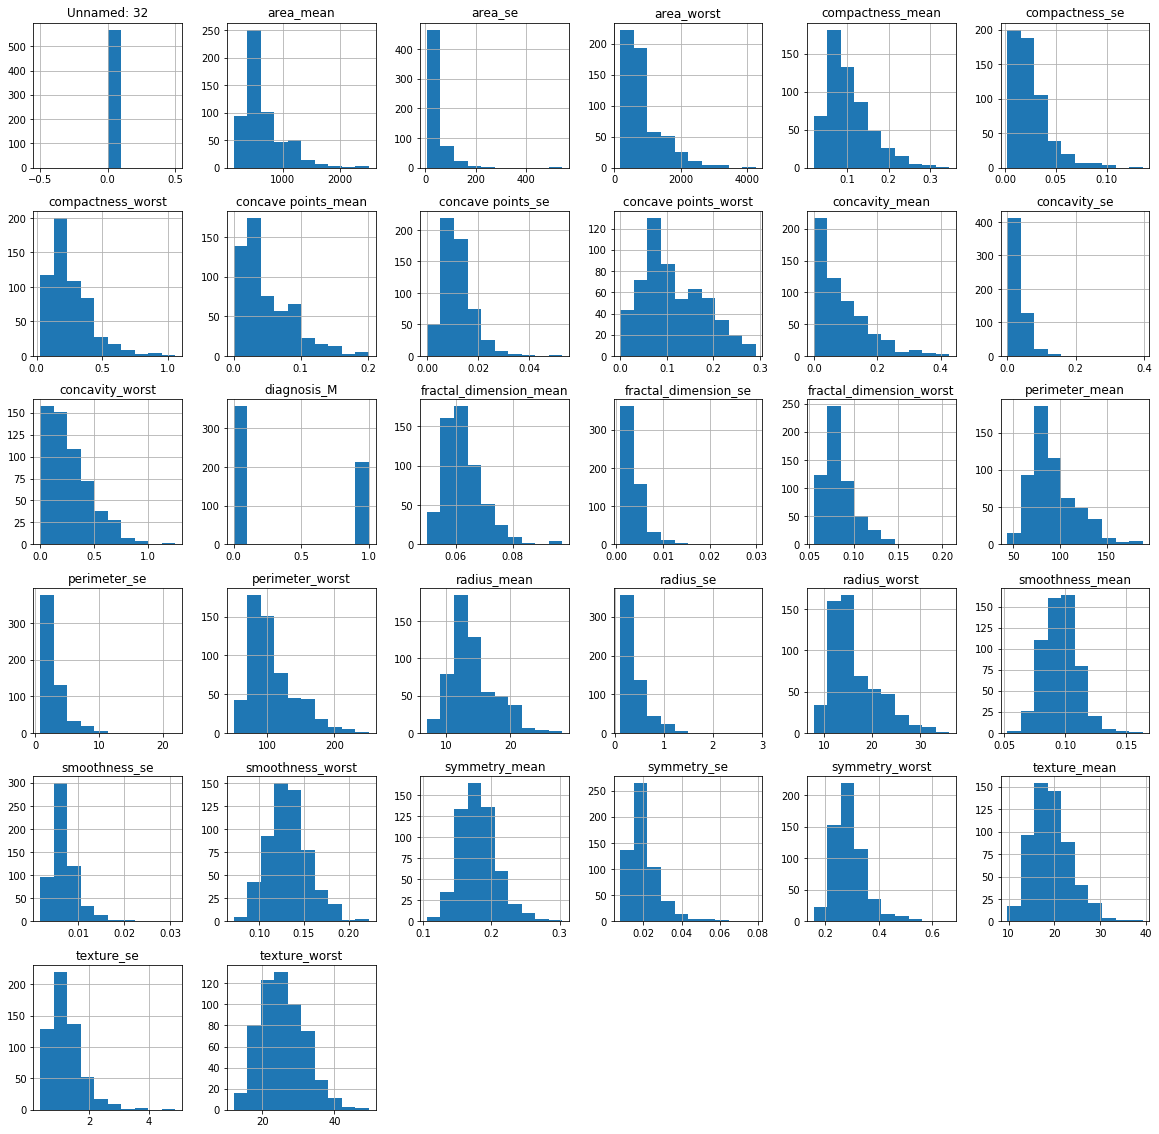

In [14]:
# ok, теперь все в цифрах и не NaN. 
df.hist(figsize=(20, 20));

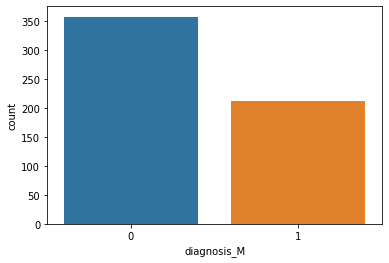

In [15]:
sns.countplot(x="diagnosis_M",data=df);

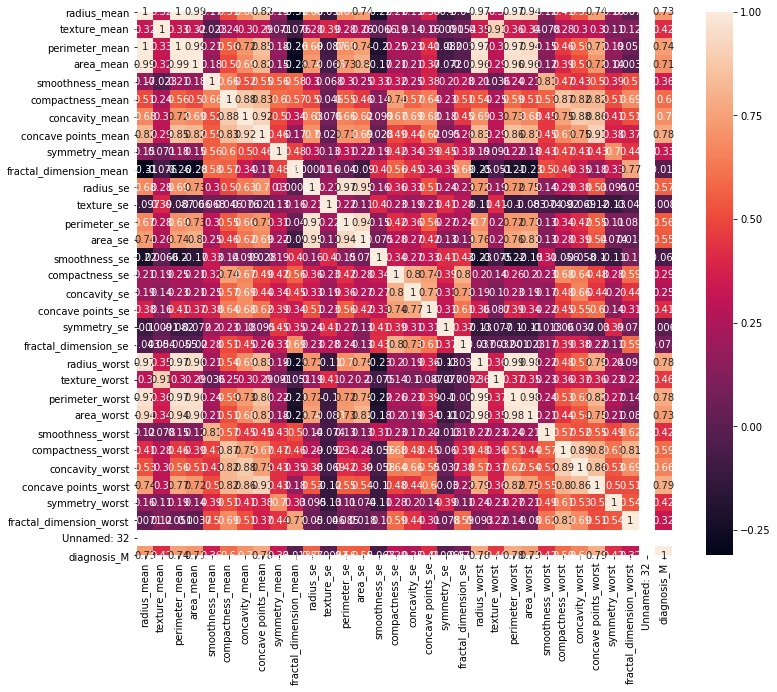

In [16]:
# дисбаланс есть, но пока не обращаем на него внимания
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True);

In [17]:
# Мда. Ну-ка цифрами:
correlations = df.corr()
used_corr_index = []
interesting_corr_index=[]
for i in correlations:
    for j in correlations.index[correlations[i].abs() > 0.85]:
        # if i != j and i not in used_corr_index and j not in used_corr_index:
        if i != j and [i,j] not in used_corr_index and [j,i] not in used_corr_index:
        #if i != j and [i,j] not in used_corr_index:
            used_corr_index.append([i,j])
            print(correlations[i][correlations.index == j].values[0], "  ", i, "  ", j )
            interesting_corr_index.append([i,j,correlations[i][correlations.index == j].values[0]])


0.9978552814938113    radius_mean    perimeter_mean
0.9873571700566119    radius_mean    area_mean
0.9695389726112053    radius_mean    radius_worst
0.9651365139559878    radius_mean    perimeter_worst
0.9410824595860459    radius_mean    area_worst
0.9120445888404215    texture_mean    texture_worst
0.9865068039913906    perimeter_mean    area_mean
0.8509770412528199    perimeter_mean    concave points_mean
0.9694763634663142    perimeter_mean    radius_worst
0.9703868870426388    perimeter_mean    perimeter_worst
0.9415498080023057    perimeter_mean    area_worst
0.9627460860470841    area_mean    radius_worst
0.959119574355266    area_mean    perimeter_worst
0.9592133256499006    area_mean    area_worst
0.8831206701772499    compactness_mean    concavity_mean
0.8658090398022638    compactness_mean    compactness_worst
0.9213910263788594    concavity_mean    concave points_mean
0.8841026390943831    concavity_mean    concavity_worst
0.8613230336379504    concavity_mean    concave poi

In [18]:
# по условиям задачи использовать будем логистическую регрессию
# для нормального обучения стоит выкинуть все корреляции больше
# 0.85 (так поставлено условия)
unique_columns_to_drop = []
for j in interesting_corr_index:
    if j[0] not in unique_columns_to_drop:
        unique_columns_to_drop.append(j[0])
print(unique_columns_to_drop, len(unique_columns_to_drop))

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'radius_worst', 'perimeter_worst', 'compactness_worst', 'concavity_worst'] 13


In [19]:
# и по этому списку дропаем все из df
for j in unique_columns_to_drop:
    df.drop([j],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 19 columns):
smoothness_mean            569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
texture_se                 569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 non-null float64
fractal_dimension_se       569 non-null float64
texture_worst              569 non-null float64
area_worst                 569 non-null float64
smoothness_worst           569 non-null float64
concave points_worst       569 non-null float64
symmetry_worst             569 non-null float64
fractal_dimension_worst    569 non-null float64
Unnamed: 32                569 non-null float64
diagnosis_M             

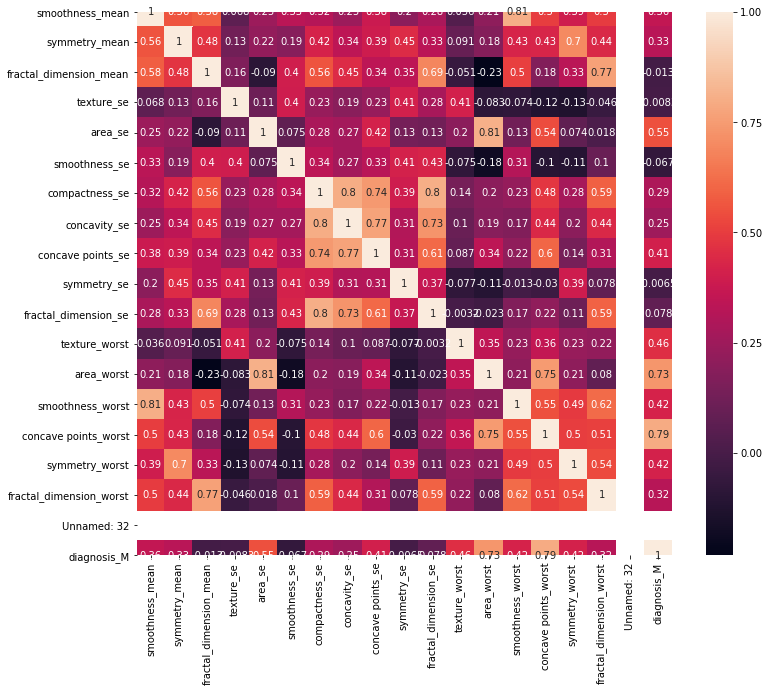

In [20]:
# теперь посмотрим корреляции
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True);

In [21]:
# "Unnamed: 32" какая-то фигня, как будто всего одно значение
df["Unnamed: 32"].unique()

array([0.])

In [22]:
# дропнем и её тоже
df.drop(["Unnamed: 32"],axis=1,inplace=True)

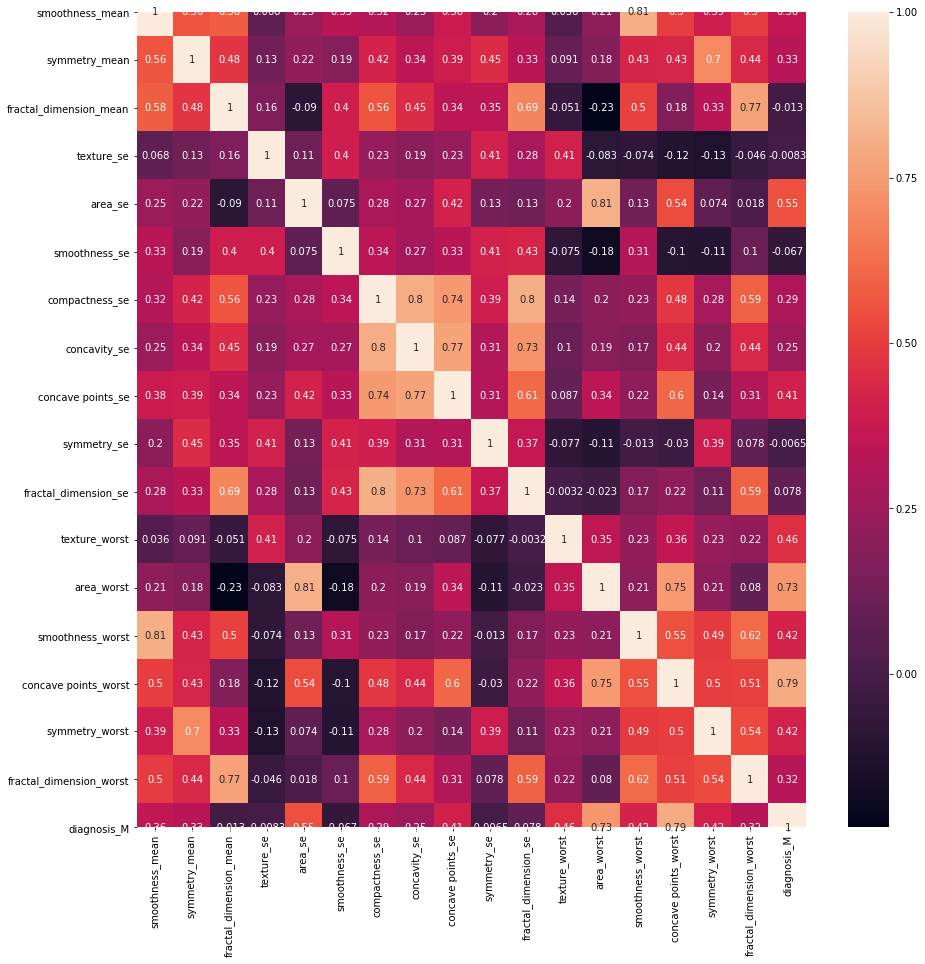

In [23]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True);

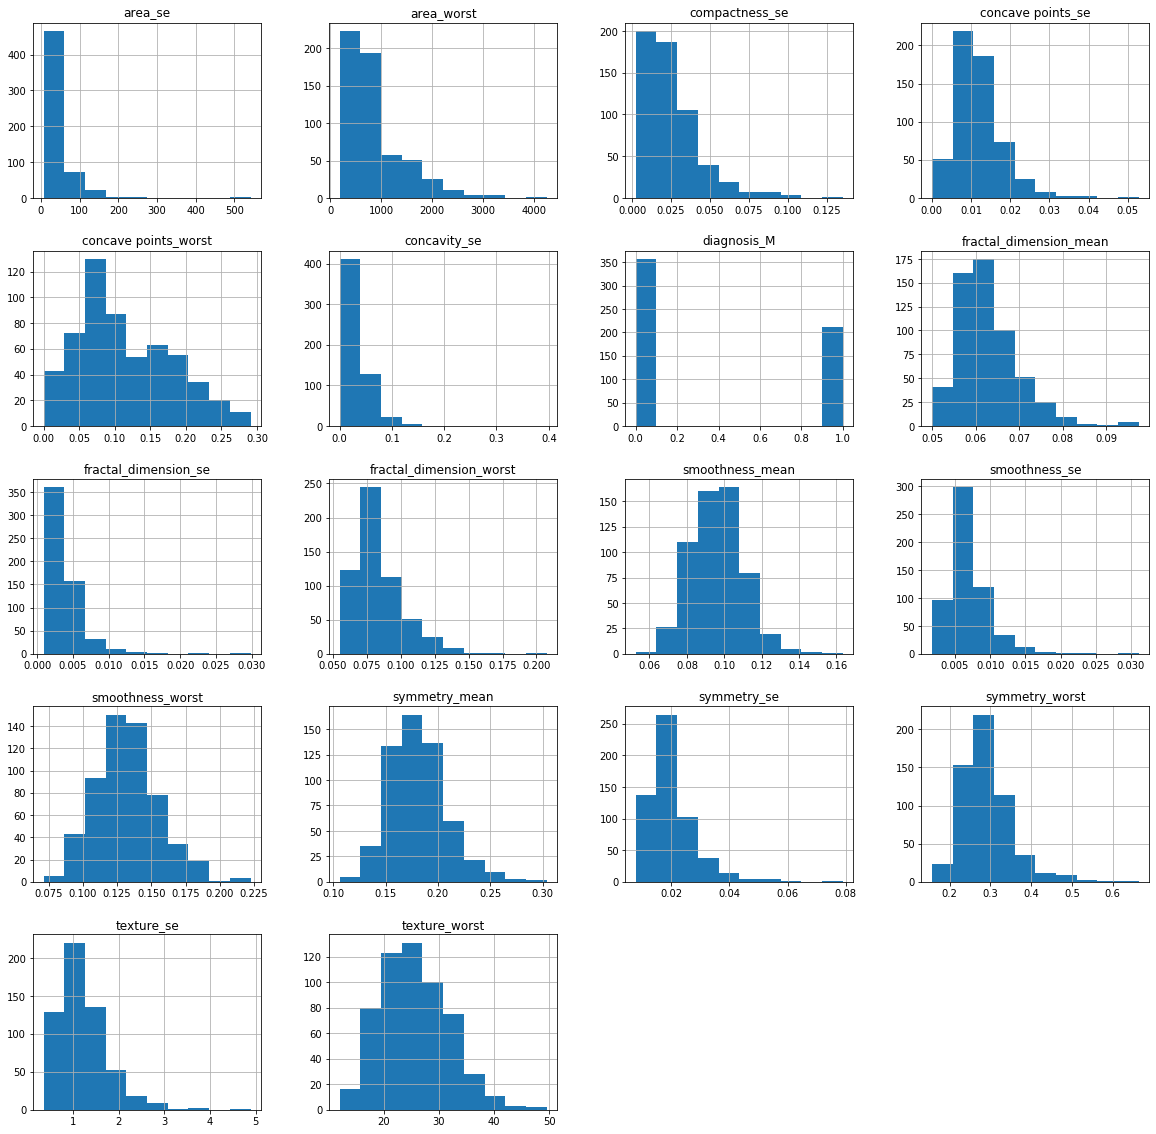

In [24]:
# корреляции норм, еще раз на гистограммы
# для повышения качества стоит с ними поработать (потом)
df.hist(figsize=(20, 20));

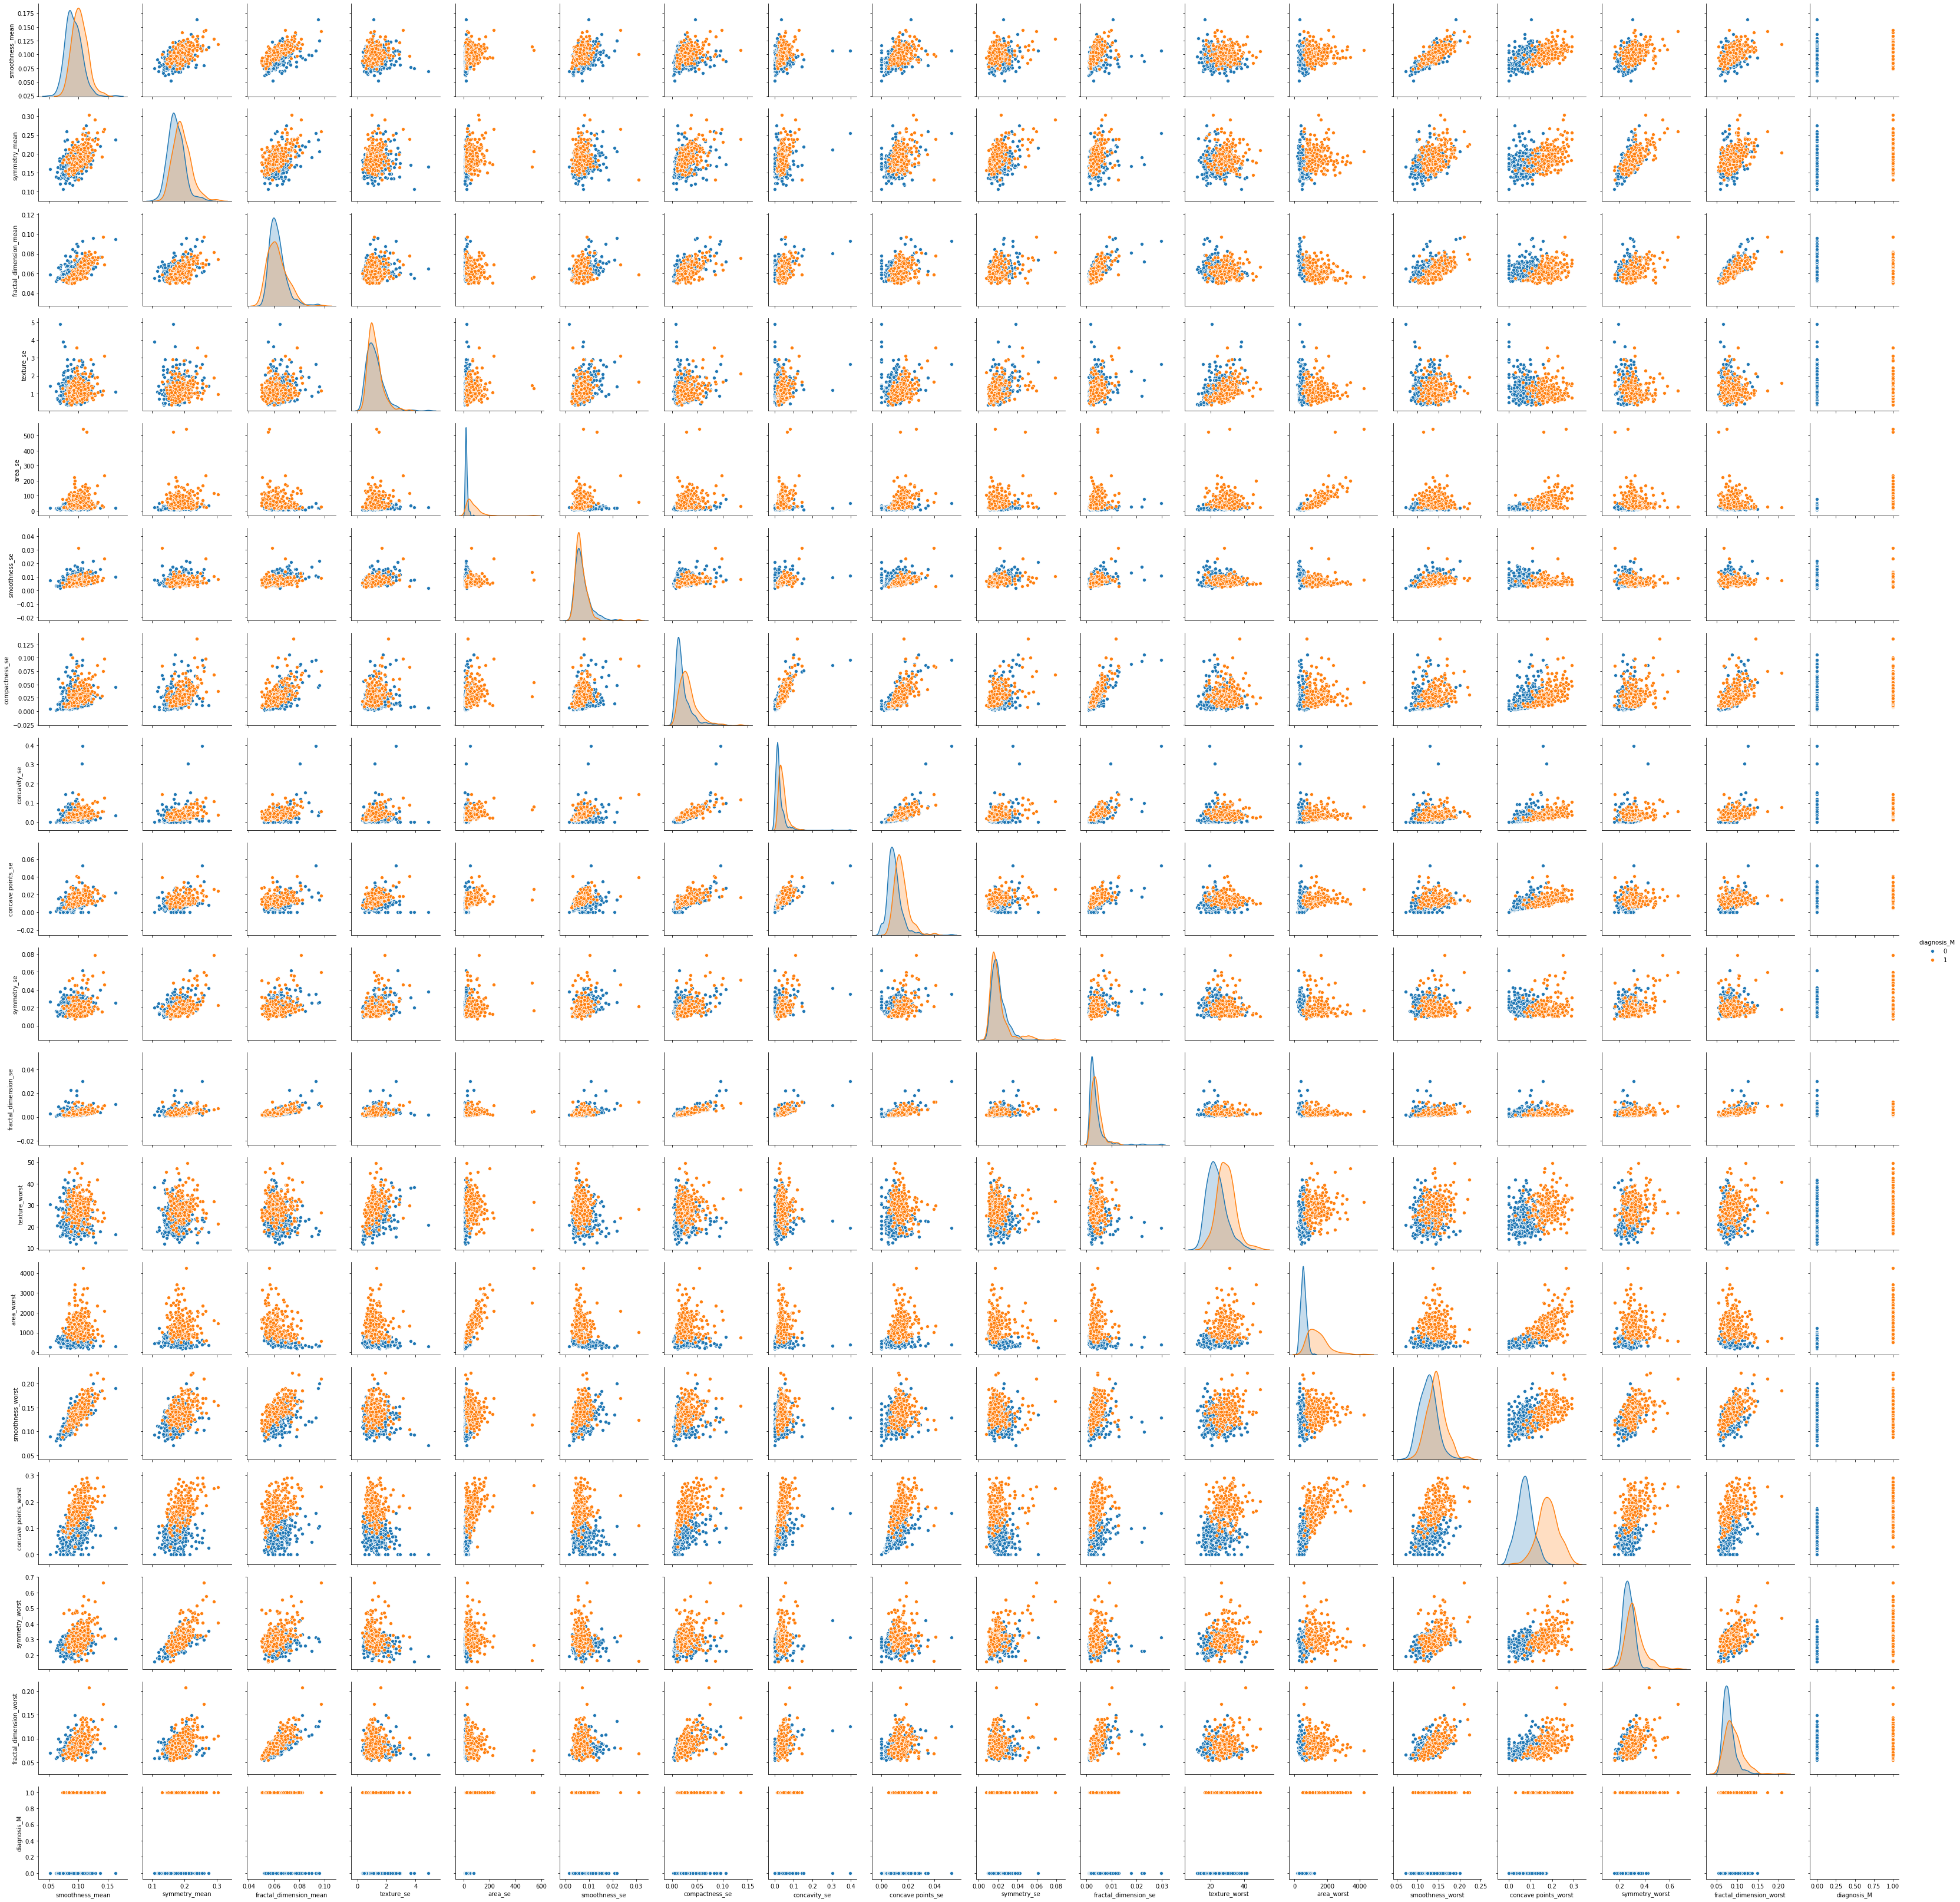

In [25]:
sns.pairplot(data=df, hue="diagnosis_M")

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [27]:
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

In [28]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(["diagnosis_M"], axis=1), 
    df["diagnosis_M"], 
    test_size=0.30, # 30% на тесты
    random_state=45, # любой id для воспроизводимой рандомности в рамках одного окружения
    stratify=df["diagnosis_M"] # бьем чтобы в тест попало пропорциональное число с True/False
)

# стандартизируем
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
log_reg = LogisticRegression()

log_reg.fit(x_train_scaled, y_train)
print("Train quality:")
quality_report(log_reg.predict(x_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg.predict(x_test_scaled), y_test)

Train quality:
Accuracy: 0.990
Precision: 0.980
Recall: 0.993
f1_score: 0.986

Test quality:
Accuracy: 0.971
Precision: 0.922
Recall: 1.000
f1_score: 0.959


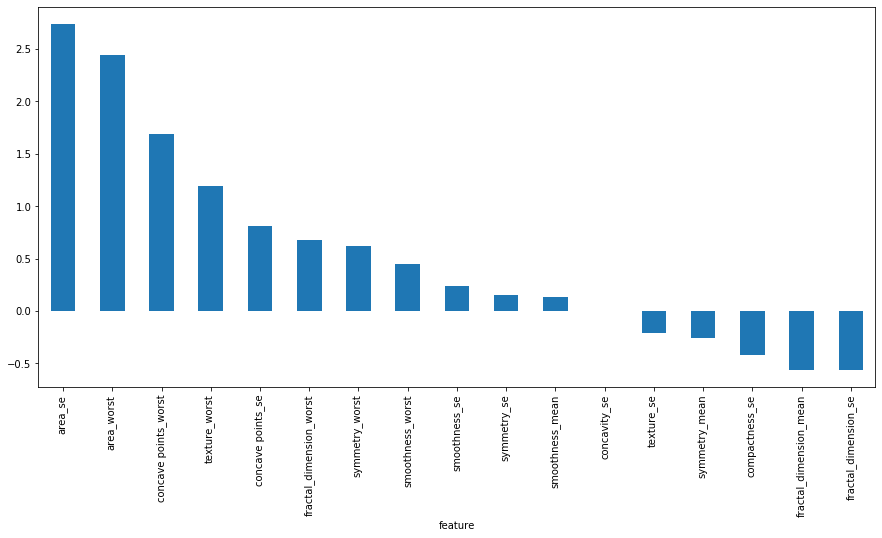

In [30]:
featureImportance = pd.DataFrame({"feature": df.drop("diagnosis_M",axis=1).columns, 
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(15, 7));

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(y_test, prob_prediction)
    auc_score = roc_auc_score(y_test, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

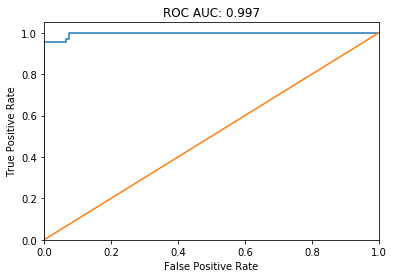

In [32]:
plot_roc_curve(log_reg.predict_proba(x_test_scaled)[:,1], y_test)

In [33]:
log_reg_cv = LogisticRegressionCV(Cs=100)
log_reg_cv.fit(x_train_scaled, y_train)
print("Train quality:")
quality_report(log_reg_cv.predict(x_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg_cv.predict(x_test_scaled), y_test)

Train quality:
Accuracy: 0.990
Precision: 0.980
Recall: 0.993
f1_score: 0.986

Test quality:
Accuracy: 0.965
Precision: 0.906
Recall: 1.000
f1_score: 0.951


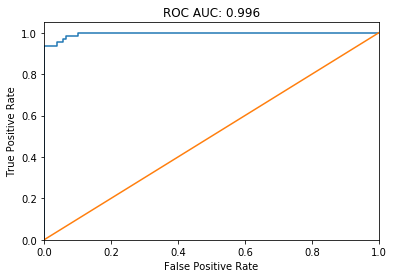

In [34]:
plot_roc_curve(log_reg_cv.predict_proba(x_test_scaled)[:,1], y_test)

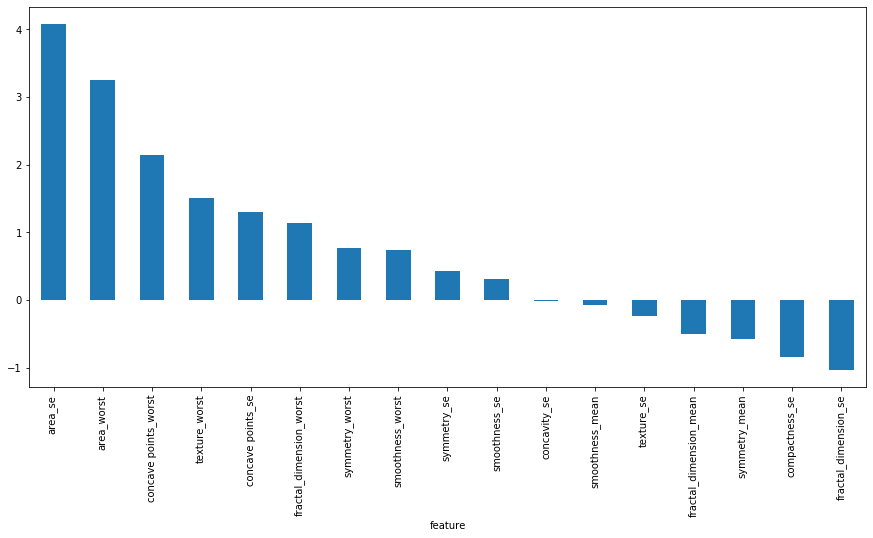

In [35]:
featureImportance = pd.DataFrame({"feature": df.drop("diagnosis_M",axis=1).columns, 
                                  "importance": log_reg_cv.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(15, 7));

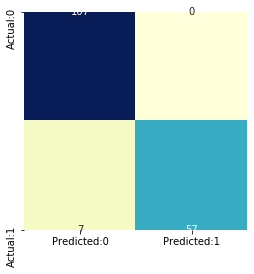

In [36]:
# на графиках плохо видно, но quality_report показывает что кросс-валидация с регуляризацией
# смогли немного улучшить качество полученной модели

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, log_reg_cv.predict_proba(x_test_scaled)[:, 1]>0.8)

conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (4,4))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

In [37]:
# видно что отсутствие рака предсказывается очень хорошо
# а наличие рака пропускаем, это плохо
# способы улучшения:
# - обрабатывать исходные данные аккуратнее, например удалять высокие корреляции не массово а по одному параметру
# - возможно стоит прологарифмировать (практически все) значения параметров, гистограммы очень удобные
# - посмотреть на выбросы индивидуально по каждому параметру
# - стараться не выкидывать данные, из и так очень мало
# - из ленивого: прогнать несколько раз кроссвалидацию с разным рандомом (с третьей попытки получили норм цифры)


In [38]:
# Вот так было при первом прогоне, до рандомизации train_test_split(random_state=43) другим числом
# новая рандомизация по CV дала на 50% лучший результат по детектированию рака
# такое сильное влияние видимо из-за малого количества исходных данных

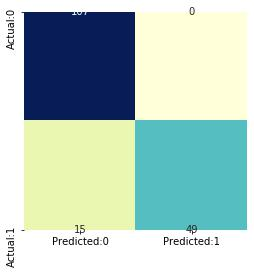